In [1]:
import numpy as np
import math
from sklearn.datasets import fetch_openml
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt
import random
from scipy.special import softmax
from scipy.special import expit
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

Using TensorFlow backend.


In [2]:
from pylab import rcParams

rcParams['figure.figsize'] = (15, 10)
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

### MNIST data

In [3]:
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)
x = (x/255).astype('float32')
y = to_categorical(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [4]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Class of Neural Network

In [5]:
class Neural_Network():
    
    def __init__(self, lear_rate, X_size, hidden_size, y_size):
        self.lear_rate = lear_rate
        self.X_size = X_size
        self.hidden_size = hidden_size
        self.y_size = y_size
        
        self.error_history = []
        self.epoch_list = []
        
        self.weights_1 = np.random.rand(self.hidden_size, self.y_size) - 0.5
        self.weights_2 = np.random.rand(self.X_size, self.hidden_size) - 0.5
    
    def sigmoid(self, x):
        return expit(x)
    
    def softmax(self, x):
        return softmax(x, axis=1)
    
    def feed_forward(self, X): 
        hidden = self.sigmoid(X.reshape(1, self.X_size) @ self.weights_2) 
        y_pred = self.softmax(hidden @ self.weights_1) 
        return hidden, y_pred
     
    def loss_(self, y, y_pred):
        loss = y.reshape(1, self.y_size) * y_pred.reshape(1, self.y_size)
        loss = loss.sum()
        if loss == 0:
            loss = 100
        else:
            loss = -(np.log(loss))
        return loss
    
    def compute_grad(self, X, hidden, y_pred, y):
        diff1 = y_pred - y.reshape(1, self.y_size)
        temp1 = diff1 @ self.weights_1.T 
        diff2 = hidden * (1 - hidden) 
        temp2 = temp1 * diff2
        grad_to_weights_2 = X.reshape(self.X_size, 1) @ temp2 
        grad_to_weights_1 = hidden.T @ diff1
        return grad_to_weights_1, grad_to_weights_2
          
    def correct_W(self, grad_to_weights_1, grad_to_weights_2):
        self.weights_1 = self.weights_1 - self.lear_rate * grad_to_weights_1
        self.weights_2 = self.weights_2 - self.lear_rate * grad_to_weights_2
        
    def train(self, X, y, epochs=400):
        for epoch in range(epochs):
            self.epoch_loss = 0
            for j in range(1000):
                i = random.randrange(1, len(X), 1)
                X_i = X[i]
                y_i = y[i]
                hidden, y_pred = self.feed_forward(X_i)
                loss = self.loss_(y_i, y_pred)
                grad_to_weights_1, grad_to_weights_2 = self.compute_grad(X_i, hidden, y_pred, y_i)
                self.correct_W(grad_to_weights_1, grad_to_weights_2)
                self.epoch_loss += loss
            self.error_history.append(self.epoch_loss)
            self.epoch_list.append(epoch)
        
    def graph(self):
        plt.plot(self.epoch_list, self.error_history)
        plt.title('Loss history')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.show() 
        
    def predict(self, X):
        hidden = self.sigmoid(X @ self.weights_2) 
        y_pred = self.softmax(hidden @ self.weights_1) 
        return y_pred
        
    def accuracy(self, y_pred, new_output):
        accuracy = y_pred * new_output
        accuracy = accuracy.sum(axis=1)
        accuracy = accuracy.sum(axis=0)
        accuracy = (accuracy / new_output.shape[0]) * 100
        print(accuracy)

### Applying NN for MNIST data

In [6]:
nn_for_mnist = Neural_Network(lear_rate=0.01, X_size=784, hidden_size=128, y_size=10)

In [7]:
nn_for_mnist.train(x_train, y_train) # X and y must be here

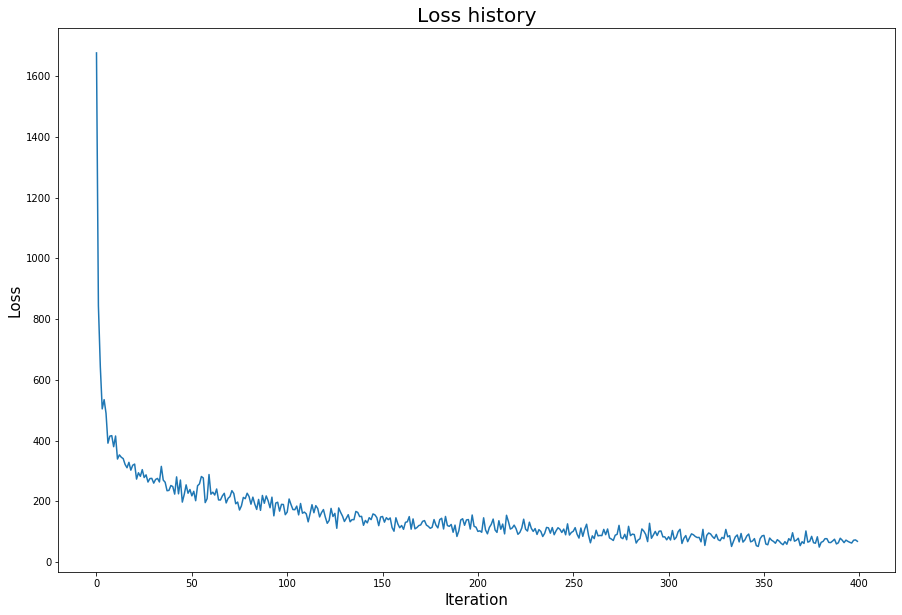

In [8]:
nn_for_mnist.graph()

In [9]:
y_pred = nn_for_mnist.predict(x_test)

In [10]:
nn_for_mnist.accuracy(y_pred, y_test)

94.52732120259094


In [11]:
accuracy_score(np.argmax(y_pred, axis=1), np.argmax(y_test, axis=1))

0.9620952380952381

### Random data

In [12]:
y1 = np.ones(100)
y2 = np.zeros(100)
y = np.hstack((y1, y2))

data = np.zeros((200, 4))

for i in range(100):
    x1 = np.random.normal(loc=4, scale=1.0)
    y1 = np.random.normal(loc=4, scale=1.0)
    z1 = np.random.normal(loc=4, scale=1.0)
    data[i][0] = x1
    data[i][1] = y1
    data[i][2] = z1
    data[i][3] = 1

for i in range(100, 200):
    x2 = np.random.normal(loc=16, scale=1.0)
    y2 = np.random.normal(loc=16, scale=1.0)
    z2 = np.random.normal(loc=16, scale=1.0)
    data[i][0] = x2
    data[i][1] = y2
    data[i][2] = z2
    data[i][3] = 1

X = data
Y = to_categorical(y)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

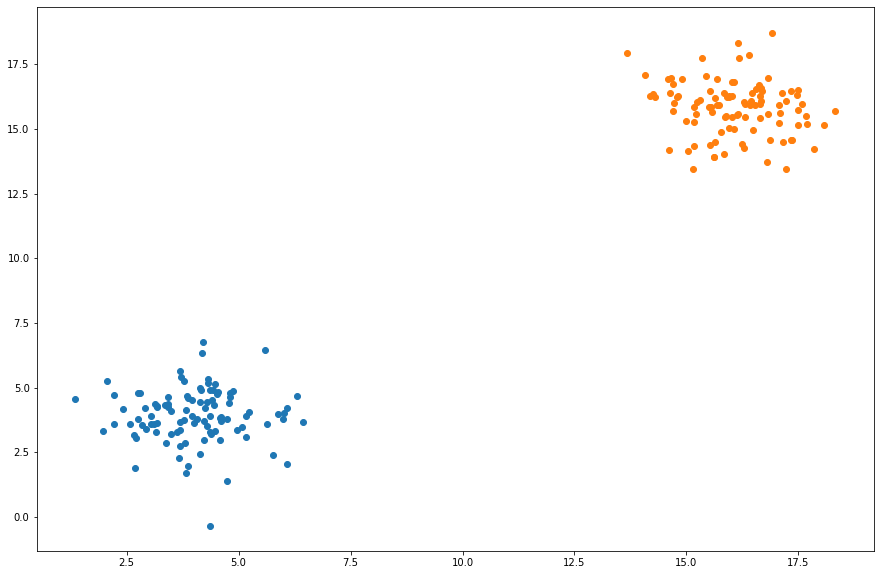

In [14]:
plt.scatter(data[:100,0], data[:100,1])
plt.scatter(data[100:200,0], data[100:200,1])

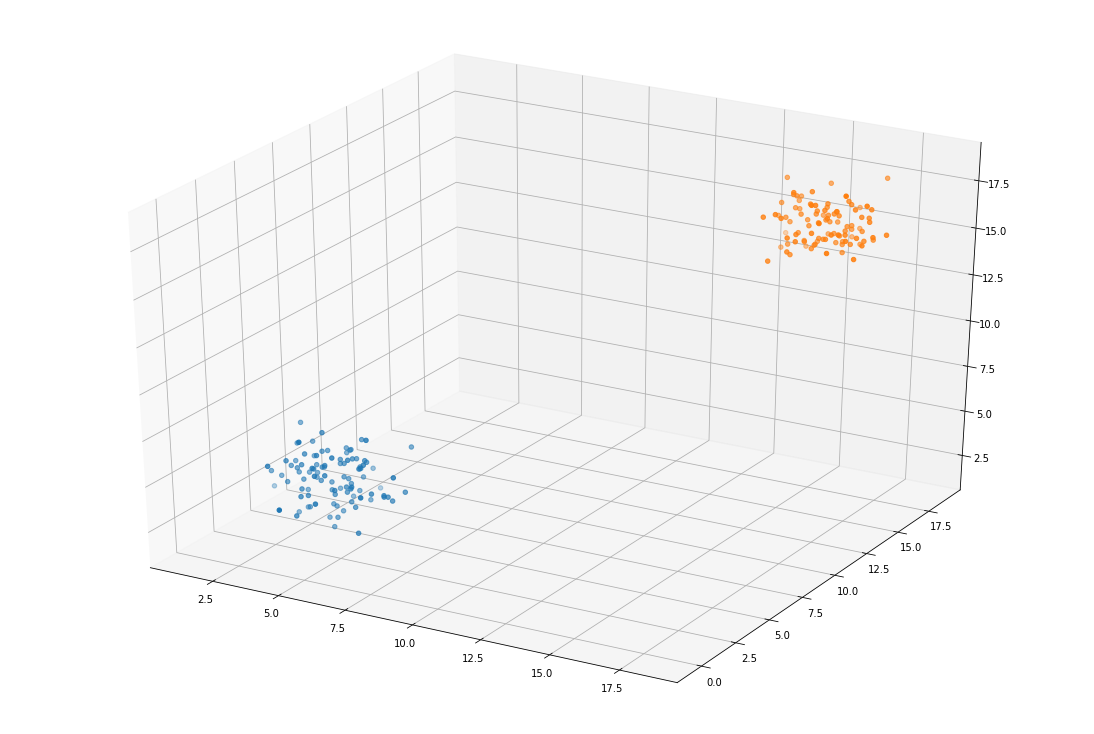

In [15]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:100,0], data[:100,1], data[:100,2])
ax.scatter(data[100:200,0], data[100:200,1], data[100:200,2])
plt.show()

### Applying NN for random data

In [16]:
nn_for_random_data = Neural_Network(lear_rate=0.01, X_size=4, hidden_size=10, y_size=2)

In [17]:
nn_for_random_data.train(X_train, Y_train)

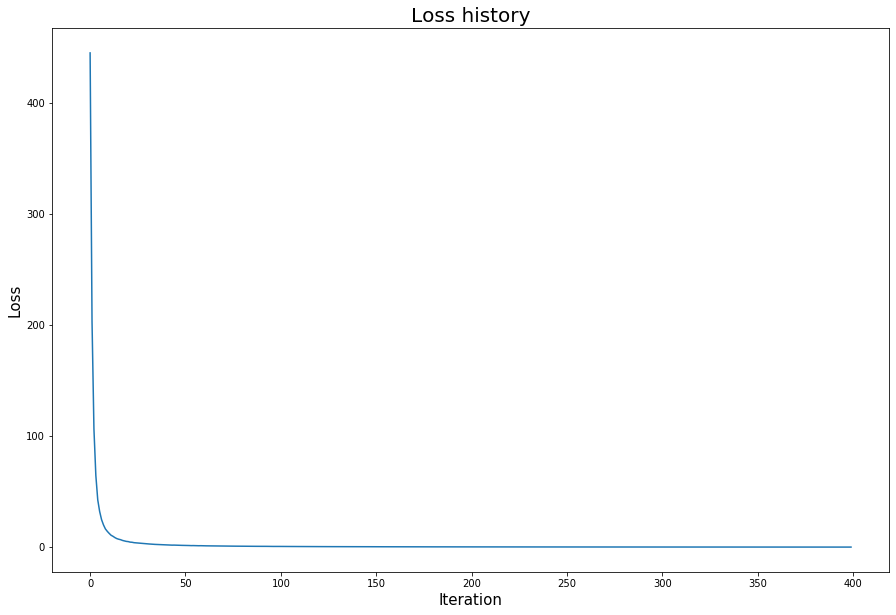

In [18]:
nn_for_random_data.graph()

In [19]:
y_pred_ = nn_for_random_data.predict(X_test)

In [20]:
nn_for_random_data.accuracy(y_pred_, Y_test)

99.97944609406255


In [21]:
accuracy_score(np.argmax(y_pred_, axis=1), np.argmax(Y_test, axis=1))

1.0